#                                          Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
# Dropping society column as it has many null values
df = df.drop('society', axis='columns')

df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

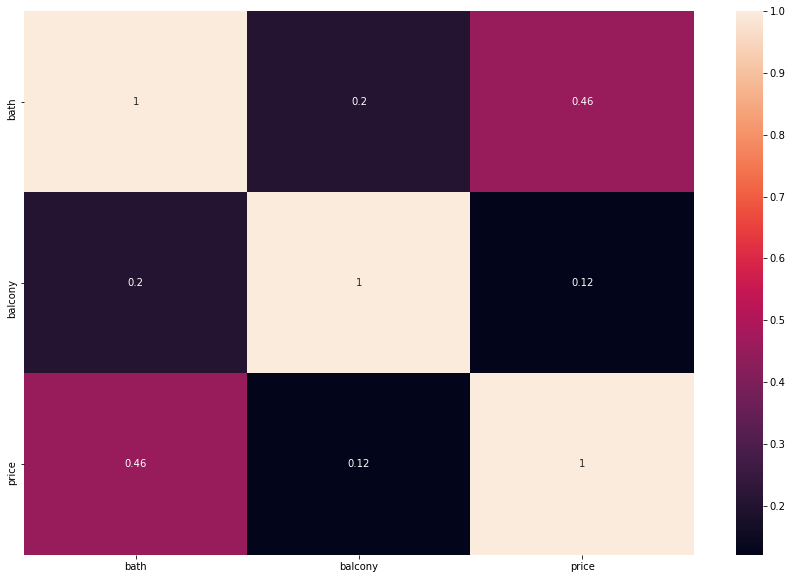

In [8]:
# Checking the correlation between baclony and price
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [9]:
# Dropping the balcony column
df = df.drop('balcony',axis='columns')

In [10]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [11]:
# Since the number of null value is very low compared to 
# the total datapoints, dropping all the null value rows.

df = df.dropna()

In [12]:
print(df['size'].unique()[0:10])

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom']


In [13]:
# Size fearure tells the number of bedrooms
# Makaing a new column for bedrooms to maintain uniformity in 
# the data

df['bedrooms'] = df['size'].apply(lambda x : int(x.split(' ')[0]))
df.head()

,area_type,availability,location,size,total_sqft,bath,price,bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
# Dropping the size column
df = df.drop('size', axis='columns')

In [15]:
df.total_sqft.unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# Looking for non-integer values in total_sqft

def float_check(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(float_check)].head()

,area_type,availability,location,total_sqft,bath,price,bedrooms
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,18-Dec,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,Ready To Move,KR Puram,1015 - 1540,2.0,56.800,2


In [17]:
# Converting the range values of total_sqft to a number
# by using their mean

def convert_num(x):
    parts = x.split('-')
    if len(parts)==2:
        return (float(parts[0])+float(parts[1]))/2
    try:
        return float(x)
    except:
        return None
df['total_sqft'] = df['total_sqft'].apply(convert_num)
df.head()

,area_type,availability,location,total_sqft,bath,price,bedrooms
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,51.00,2


In [18]:
df = df.dropna()
df.isnull().sum()

area_type       0
availability    0
location        0
total_sqft      0
bath            0
price           0
bedrooms        0
dtype: int64

In [19]:
df.shape

(13200, 7)

In [21]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [20]:
df.to_csv('House_data_cleaned.csv', index=False)